In [71]:
import pandas as pd
import numpy as np

In [72]:
df = pd.read_csv('/content/drive/MyDrive/100 days of ML by campusX/placement.csv')

In [73]:
# above dataset is about placement of students based on iq and cgpa factor

In [74]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [75]:
# only 3 columns are of use....unnamed column can be removed through pre processing

In [76]:
df.shape

(100, 4)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [78]:
#float can be converted to int for iq, placement represents boolean values

In [79]:
# Steps to be used

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [80]:
df = df.iloc[:,1:]
# all rows (:) and all columns starting from (index 1) to the last(1:)

In [81]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [82]:
import matplotlib.pyplot as plt

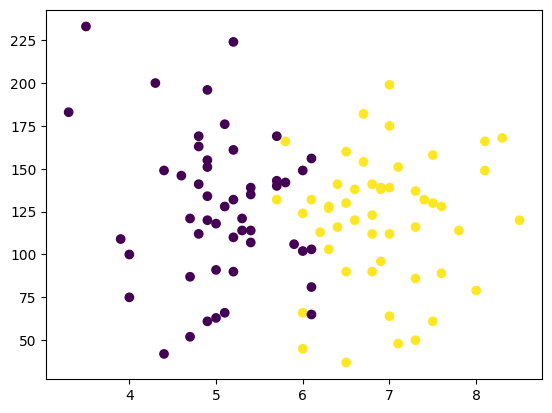

In [83]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
# CGPA-->x-axis, IQ-->y-axis,color-coded points based on values in placement

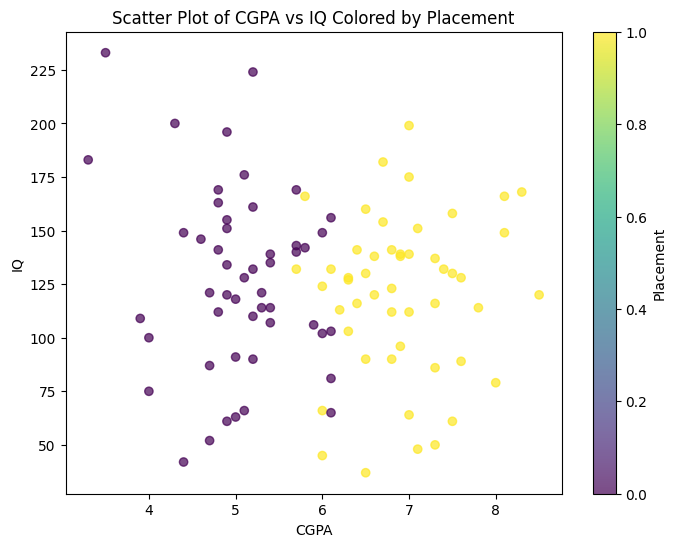

In [84]:
#enhanced version of scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['cgpa'], df['iq'], c=df['placement'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Placement')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs IQ Colored by Placement')
plt.show()


In [85]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
#cgpa,iq--> independent variable, placement--> dependent

In [86]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [87]:
#another way to represent to have more power over columns
X = df[['cgpa', 'iq']]
y = df['placement']


In [88]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [89]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [90]:
y.shape # 1D tensor

(100,)

In [91]:
from sklearn.model_selection import train_test_split
#X: Features (input data), y: Target variable (output data)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
# 10% of the data will go into test set, and 90% into training set

In [92]:
X_train

,cgpa,iq
7,5.0,63.0
11,6.9,138.0
6,5.7,143.0
76,4.9,155.0
28,5.2,90.0
...,...,...
19,5.2,132.0
90,7.3,86.0
14,6.1,103.0
79,6.5,90.0


In [93]:
X_test

,cgpa,iq
99,6.2,113.0
80,4.9,196.0
36,5.7,140.0
65,8.1,166.0
85,5.8,166.0
34,4.8,163.0
68,4.0,75.0
35,6.8,90.0
12,5.4,139.0
3,7.4,132.0


In [94]:
y_train

,placement
7,0
11,1
6,0
76,0
28,0
...,...
19,0
90,1
14,0
79,1


In [95]:
from sklearn.preprocessing import StandardScaler
# standardize features

In [96]:
scaler = StandardScaler()


In [97]:
X_train = scaler.fit_transform(X_train) #z-score normalization--> subtracting mean-->dividing by standard deviation

In [98]:
X_train

array([[-0.8835001 , -1.47880536],
       [ 0.79515009,  0.40174027],
       [-0.26505003,  0.52710997],
       [-0.97185011,  0.82799728],
       [-0.70680008, -0.80180894],
       [ 1.8553502 ,  0.67755363],
       [-0.79515009,  1.35455005],
       [-1.41360015, -2.00535814],
       [ 1.14855012, -0.14988645],
       [-1.50195016,  1.95632465],
       [-2.38545026,  1.53006764],
       [ 0.08835001, -1.42865748],
       [-1.14855012, -1.75461872],
       [ 0.44175005,  0.95336698],
       [ 1.32525014,  0.20114873],
       [-0.26505003,  1.17903246],
       [ 0.08835001,  0.85307122],
       [ 0.97185011,  0.72770151],
       [ 2.20875024, -0.04959068],
       [ 1.32525014,  0.9032191 ],
       [-0.8835001 , -0.09973857],
       [-0.08835001, -0.40062587],
       [-0.53010006,  0.32651844],
       [-1.06020012,  0.47696209],
       [-0.61845007, -0.20003434],
       [ 0.79515009, -0.65136529],
       [ 0.26505003,  0.15100085],
       [-0.53010006, -0.20003434],
       [ 0.08835001,

In [99]:
X_test = scaler.transform(X_test)

In [100]:
X_test

array([[ 0.17670002, -0.22510828],
       [-0.97185011,  1.85602889],
       [-0.26505003,  0.45188815],
       [ 1.8553502 ,  1.10381063],
       [-0.17670002,  1.10381063],
       [-1.06020012,  1.02858881],
       [-1.76700019, -1.17791806],
       [ 0.70680008, -0.80180894],
       [-0.53010006,  0.42681421],
       [ 1.23690013,  0.25129662]])

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
clf = LogisticRegression()

In [103]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [104]:
y_pred = clf.predict(X_test)

In [105]:
y_test

,placement
99,1
80,0
36,0
65,1
85,1
34,0
68,0
35,1
12,0
3,1


In [106]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test,y_pred) # accuracy= 90% predicted correct, 10% wrong

0.9

In [108]:
from mlxtend.plotting import plot_decision_regions # visualize decision boundaries of a classifier in 2D space

<Axes: >

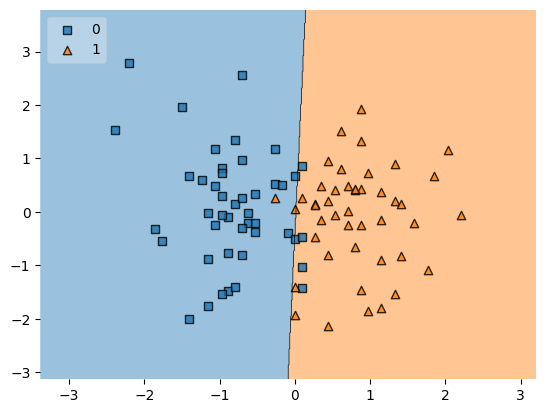

In [109]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [110]:
import pickle

In [111]:
pickle.dump(clf,open('model.pkl','wb'))# save trained machine learning model (clf) to a file